# Saurabh Kumar | ESET0128  |   Advance Python AIML DAY:10

## Building Machine Learning Model for DailyDelhiClimateTrain

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load Dataset
df = pd.read_csv('/content/DailyDelhiClimateTrain.csv')
dft = pd.read_csv('/content/DailyDelhiClimateTest.csv')

In [15]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [3]:
# Convert Date Column to Datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.sort_values('date').set_index('date')

In [4]:
# Basic Info
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nFirst 5 Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB
None

Missing Values:
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

First 5 Rows:
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000


In [5]:
# Statistical Summary
print("\nStatistical Summary:")
print(df.describe().T)


Statistical Summary:
               count         mean         std        min          25%  \
meantemp      1462.0    25.495521    7.348103   6.000000    18.857143   
humidity      1462.0    60.771702   16.769652  13.428571    50.375000   
wind_speed    1462.0     6.802209    4.561602   0.000000     3.475000   
meanpressure  1462.0  1011.104548  180.231668  -3.041667  1001.580357   

                      50%          75%          max  
meantemp        27.714286    31.305804    38.714286  
humidity        62.625000    72.218750   100.000000  
wind_speed       6.221667     9.238235    42.220000  
meanpressure  1008.563492  1014.944901  7679.333333  


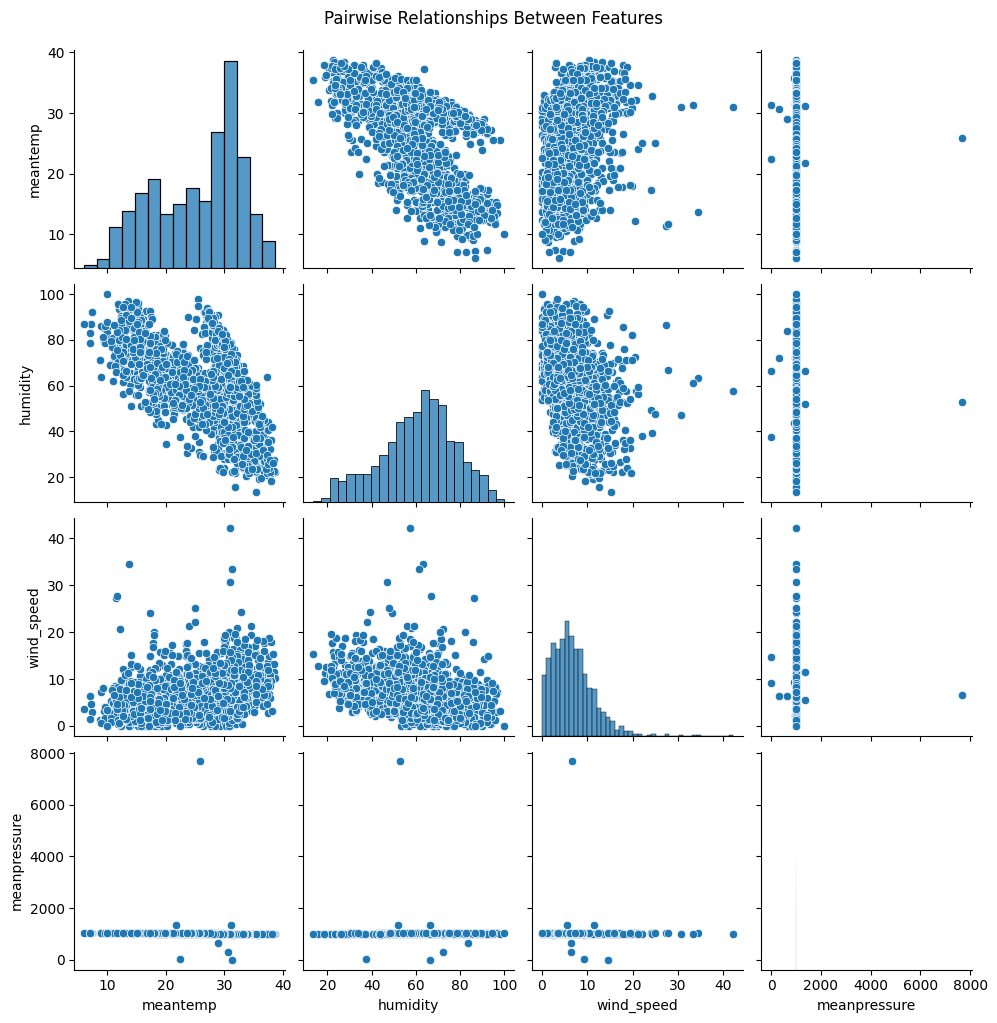

In [6]:
# Pairwise Relationships
sns.pairplot(df)
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()

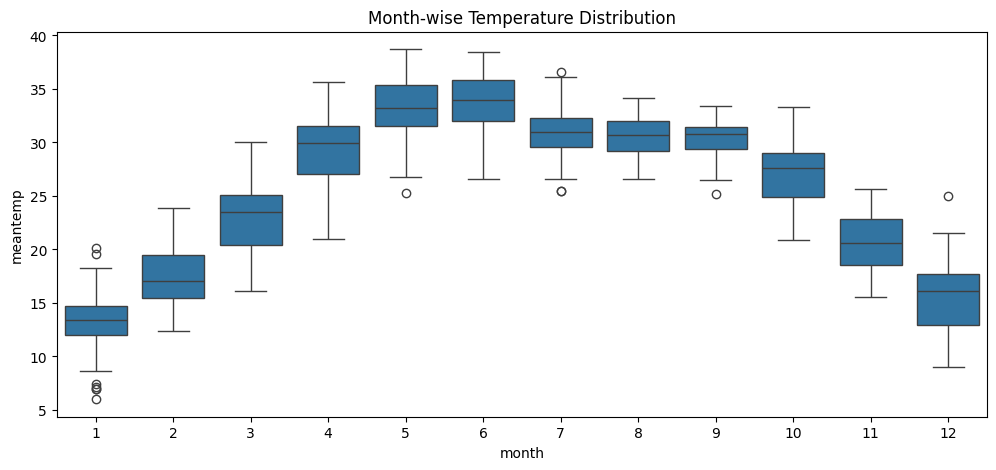

In [9]:
# Month-wise and Year-wise Aggregations
df['month'] = df.index.month
df['year'] = df.index.year

plt.figure(figsize=(12,5))
sns.boxplot(x='month', y='meantemp', data=df)
plt.title("Month-wise Temperature Distribution")
plt.show()

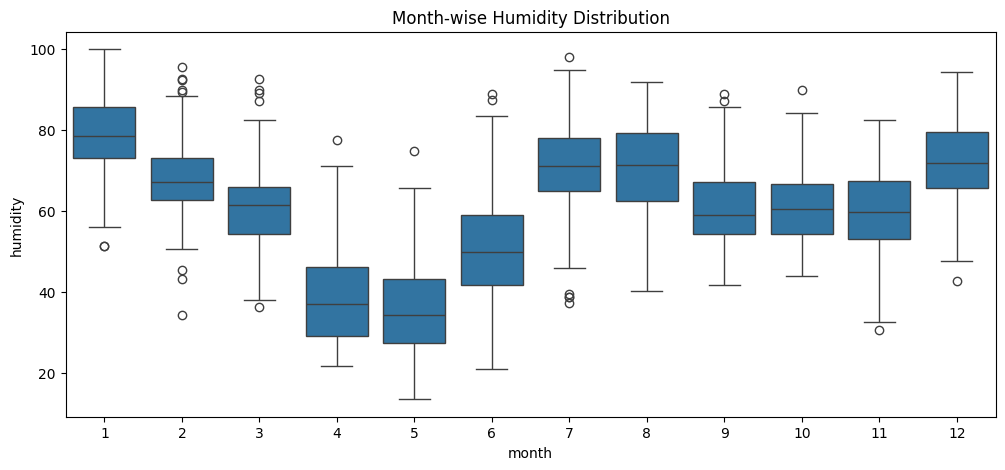

In [11]:
# Month-wise and Year-wise Aggregations
df['month'] = df.index.month
df['year'] = df.index.year

plt.figure(figsize=(12,5))
sns.boxplot(x='month', y='humidity', data=df)
plt.title("Month-wise Humidity Distribution")
plt.show()

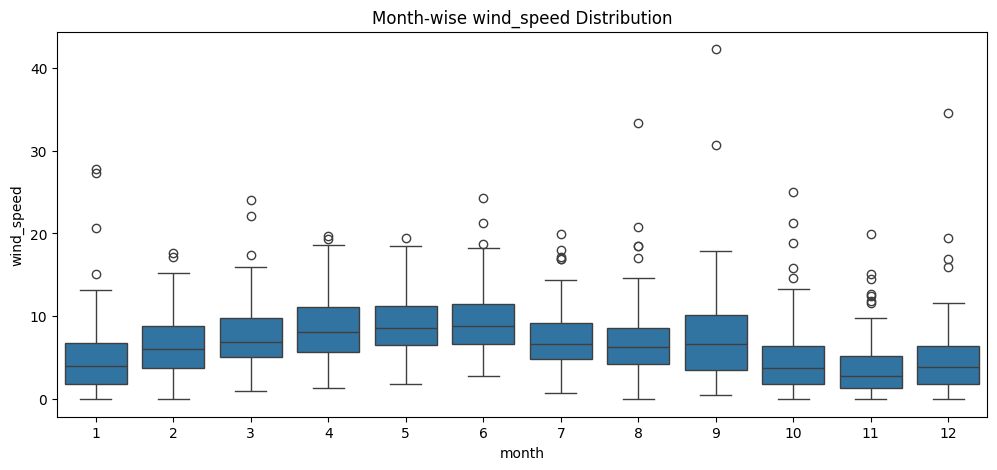

In [12]:
# Month-wise and Year-wise Aggregations
df['month'] = df.index.month
df['year'] = df.index.year

plt.figure(figsize=(12,5))
sns.boxplot(x='month', y='wind_speed', data=df)
plt.title("Month-wise wind_speed Distribution")
plt.show()

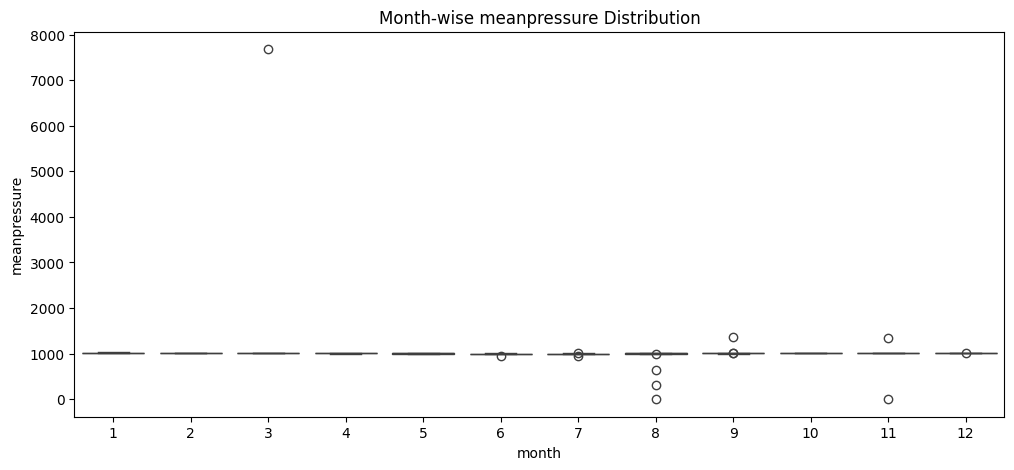

In [13]:
# Month-wise and Year-wise Aggregations
df['month'] = df.index.month
df['year'] = df.index.year

plt.figure(figsize=(12,5))
sns.boxplot(x='month', y='meanpressure', data=df)
plt.title("Month-wise meanpressure Distribution")
plt.show()

Correlation Matrix:
               meantemp  humidity  wind_speed  meanpressure
meantemp      1.000000 -0.571951    0.306468     -0.038818
humidity     -0.571951  1.000000   -0.373972      0.001734
wind_speed    0.306468 -0.373972    1.000000     -0.020670
meanpressure -0.038818  0.001734   -0.020670      1.000000 



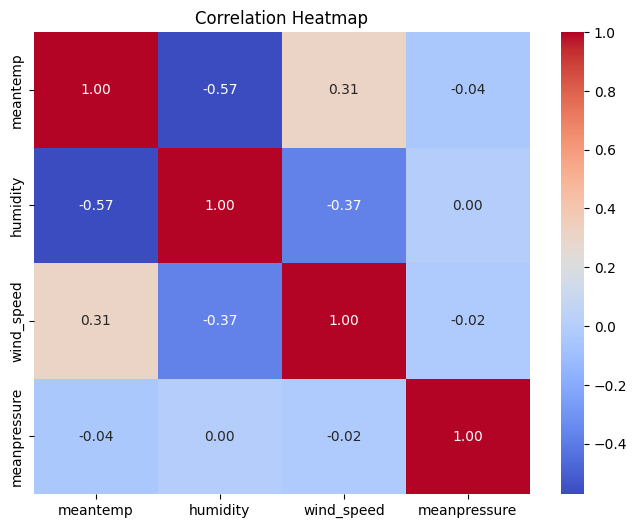

In [8]:
print("Correlation Matrix:\n",df.corr(),"\n")
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [21]:
df=df.drop(['date'],axis=1)
x_train=df.drop(['meantemp'],axis=1)
y_train=df['meantemp']

In [24]:
dft=dft.drop(['date'],axis=1)
x_test=dft.drop(['meantemp'],axis=1)
y_test=dft['meantemp']

### Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg=LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

In [27]:
y_pred=reg.predict(x_test)

In [28]:
print("Training r2 score:",r2_score(y_train,reg.predict(x_train)))
print("Testing r2 score:",r2_score(y_test,y_pred))

Training r2 score 0.3383641373058779
Testing r2 score 0.05624920443287673


### Ridge Regression

R2_score: 0.05624923098188206
MAE: 5.274490920599234
MSE: 37.84033341337581
[-0.23308922  0.17203289 -0.00145503]


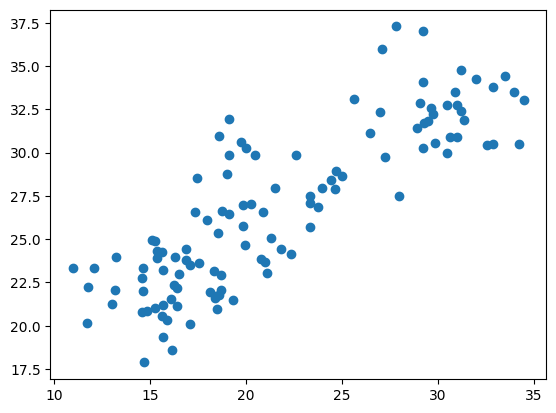

In [33]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import Ridge

ridge=Ridge(0.01)
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)

r_score=r2_score(y_test,y_pred_ridge)
print("R2_score:",r_score)
mean_abs_err=mean_absolute_error(y_test,y_pred_ridge)
print("MAE:",mean_abs_err)
mean_sq_err=mean_squared_error(y_test,y_pred_ridge)
print("MSE:",mean_sq_err)

print(ridge.coef_)
plt.scatter(y_test,y_pred_ridge)

### Elastic Net

Training r2 score: 0.33836412955207773
Testing R2_score: 0.05631656748015679
MAE: 5.274265432517692
MSE: 37.83763351036195
Elastic Net Coefficient: [-0.23309403  0.17188544 -0.00145503]


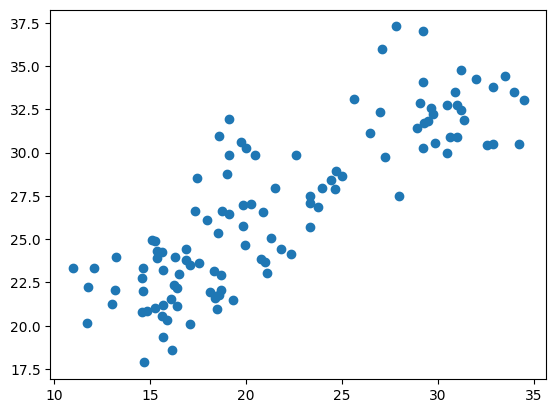

In [40]:
# Elasticnet Regression
from sklearn.linear_model import ElasticNet

elas_Net=ElasticNet(0.005)
elas_Net.fit(x_train,y_train)
y_pred_elas_Net=elas_Net.predict(x_test)
print("Training r2 score:",r2_score(y_train,elas_Net.predict(x_train)))
r_score=r2_score(y_test,y_pred_elas_Net)
print("Testing R2_score:",r_score)
mean_abs_err=mean_absolute_error(y_test,y_pred_elas_Net)
print("MAE:",mean_abs_err)
mean_sq_err=mean_squared_error(y_test,y_pred_elas_Net)
print("MSE:",mean_sq_err)

print("Elastic Net Coefficient:",elas_Net.coef_)
plt.scatter(y_test,y_pred_elas_Net)

### Decision Tree

In [35]:
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor()
reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [36]:
y_pred=reg.predict(x_test)

In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r_score=r2_score(y_test,y_pred)
print("Training R2 Score:",r2_score(y_train,reg.predict(x_train)))
print("Testing R2_Score:",r_score)
mean_abs_err=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error",mean_abs_err)
mean_sq_err=mean_squared_error(y_test,y_pred)
print("Mean Squared Error",mean_sq_err)

Training R2 Score: 1.0
Testing R2_Score: 0.5741490766527695
Mean Absolute Error 3.3139329004940863
Mean Squared Error 17.07478441646047
